In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import seaborn as sb

In [6]:
sb.set_context("notebook")
sb.set_style("ticks")
sb.set_palette("colorblind")

### Load datasets

In [12]:
data_reg = pd.read_csv('EValuateNY-ZIP-File/ny_ev_registrations.csv')

In [7]:
data_demo = pd.read_csv('EValuateNY-ZIP-File/census_bureau_demographics.csv')

In [72]:
data_charging = pd.read_csv('EValuateNY-ZIP-File/resources_charginguse.csv')

In [9]:
data_rebate = pd.read_csv('EValuateNY-ZIP-File/resources_driveclean.csv')

In [14]:
data_reg.head()

,VIN,ZIP Code,Registration Valid Date,VIN Prefix,DMV ID,VIN Model Year,Registration Expiration Date,Registration,DMV Snapshot (Date),DMV Snapshot Date,State Abbreviation,Geography,Vehicle Name
0,1G1RH6E49EU173376,14616,2019-08-17,1G1RH6E4,40,E,2021-08-14,Renewal,DATA.NY.GOV (5/4/2020),5/4/2020,NY,ZIP Code,Chevrolet Volt
1,1G1RH6E49EU164726,13652,2019-12-30,1G1RH6E4,40,E,2022-01-16,Renewal,DATA.NY.GOV (5/4/2020),5/4/2020,NY,ZIP Code,Chevrolet Volt
2,1G1RH6E49EU159851,10580,2018-11-28,1G1RH6E4,40,E,2021-02-14,Renewal,DATA.NY.GOV (5/4/2020),5/4/2020,NY,ZIP Code,Chevrolet Volt
3,1G1RH6E49EU155881,14534,2019-10-18,1G1RH6E4,40,E,2021-10-25,Renewal,DATA.NY.GOV (5/4/2020),5/4/2020,NY,ZIP Code,Chevrolet Volt
4,1G1RH6E49EU155587,11795,2019-03-15,1G1RH6E4,40,E,2021-03-14,Renewal,DATA.NY.GOV (5/4/2020),5/4/2020,NY,ZIP Code,Chevrolet Volt


In [8]:
data_charging.head()

,Start Date,ZIP Code,Network,Charging Time (hours),Total Duration (hours),Energy (kWh),Charging Sessions,Active Station Count,Active Port Count
0,3/1/19,10468,EV Connect,8,9,127.348,6,3,3
1,2/1/19,10468,EV Connect,2,20,1135.876,45,3,3
2,3/1/19,11520,EV Connect,0,22,100.271,9,2,2
3,1/1/19,10468,EV Connect,6,17,1580.828,54,3,3
4,2/1/19,11520,EV Connect,11,0,425.306,45,2,2


In [7]:
data_demo.head()

,Household Income in Past 12 Months,Households,Households (1 Vehicle Available),Households (2 Vehicles Available),Households (3 Vehicles Available),Households (4 or More Vehicles Available),Households (No Vehicle Available),Housing Units,"Housing Units (1, Attached)","Housing Units (1, Detached)",...,"Educational Attainment (12th grade, no diploma)",Educational Attainment (Regular high school diploma),Educational Attainment (GED or alternative credential),"Educational Attainment (Some college, less than 1 year)","Educational Attainment (Some college, 1 or more years, no degree)",Educational Attainment (Associate's degree),Educational Attainment (Bachelor's degree),Educational Attainment (Master's degree),Educational Attainment (Professional school degree),Educational Attainment (Doctorate degree)
0,73,73,39,11,2,21,0,758,3,723,...,4.0,63.0,36.0,0.0,2.0,0.0,36.0,5.0,0.0,20.0
1,4105,4105,1032,1839,731,361,142,4746,0,4203,...,91.0,2037.0,213.0,491.0,919.0,975.0,1420.0,1131.0,67.0,78.0
2,17256,17256,5670,792,126,34,10634,18656,604,373,...,438.0,3966.0,642.0,1128.0,2744.0,1282.0,11797.0,4846.0,814.0,271.0
3,29345,29345,7844,1954,356,155,19036,32088,1755,578,...,990.0,13737.0,2235.0,1374.0,5981.0,3803.0,8449.0,3310.0,430.0,321.0
4,32269,32269,13713,3200,381,68,14907,35319,2212,2491,...,1269.0,11484.0,1656.0,1411.0,4407.0,4521.0,16573.0,8694.0,2083.0,1053.0


In [9]:
data_rebate.head()

,Submitted Date,ZIP Code,Transaction Type,Annual GHG Emissions,Annual Petroleum Reduction,Rebate ($),Vehicle Name,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,10/7/20,10549.0,Purchase,2.99,592.89,"$2,000",Tesla Model 3,NaN,NaN,NaN
1,3/29/17,12189.0,Purchase,1.66,292.89,$500,Audi A3 Plug In,NaN,NaN,NaN
2,10/8/20,14623.0,Lease,2.91,592.89,"$2,000",Nissan Leaf,NaN,NaN,NaN
3,10/13/20,10956.0,Purchase,2.52,592.89,$500,Tesla Model X,NaN,NaN,NaN
4,10/20/20,11747.0,Lease,2.52,592.89,$500,Tesla Model X,NaN,NaN,NaN


In [73]:
#Remove NaNs and spurious values
data_demo = data_demo.dropna()
data_charging = data_charging.dropna()

In [150]:
data_charging['Start Date'] = pd.to_datetime(data_charging['Start Date'])
data_charging['Start Date'].min(),data_charging['Start Date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))

In [151]:
data_reg['Registration Valid Date'] = pd.to_datetime(data_reg['Registration Valid Date'])
data_reg['Registration Valid Date'].min(),data_reg['Registration Valid Date'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2021-01-30 00:00:00'))

In [152]:
charging_zip_codes = np.unique(data_charging['ZIP Code'])
reg_zip_codes = data_reg['ZIP Code']

In [153]:
reg_in_charging = np.isin(reg_zip_codes,charging_zip_codes)

In [182]:
data_reg_charging = data_reg[reg_in_charging&(data_reg['Registration']=='Original')]

In [185]:
date_ranges = pd.date_range(start=data_reg_charging['Registration Valid Date'].min(),end=data_charging['Start Date'].max(),freq="30D")

In [186]:
monthly_regs = []
for i in range(len(date_ranges)-1):
    start_date = date_ranges[i]
    end_date = date_ranges[i+1]
    after_start_reg = data_reg_charging['Registration Valid Date'] >= start_date
    before_end_reg =  data_reg_charging['Registration Valid Date'] <= end_date
    between_two_reg = after_start_reg & before_end_reg
    filtered_reg = data_reg_charging.loc[between_two_reg]
    monthly_regs.append(len(filtered_reg))

In [187]:
cumulative_monthly_regs = np.cumsum(monthly_regs)

In [188]:
monthly_ports = []
for i in range(len(date_ranges)-1):
    start_date = date_ranges[i]
    end_date = date_ranges[i+1]
    after_start_charging = data_charging['Start Date'] >= start_date
    before_end_charging =  data_charging['Start Date'] <= end_date
    between_two_charging = after_start_charging & before_end_charging
    filtered_charging = data_charging.loc[between_two_charging]
    monthly_ports.append(np.sum(filtered_charging['Active Station Count']))

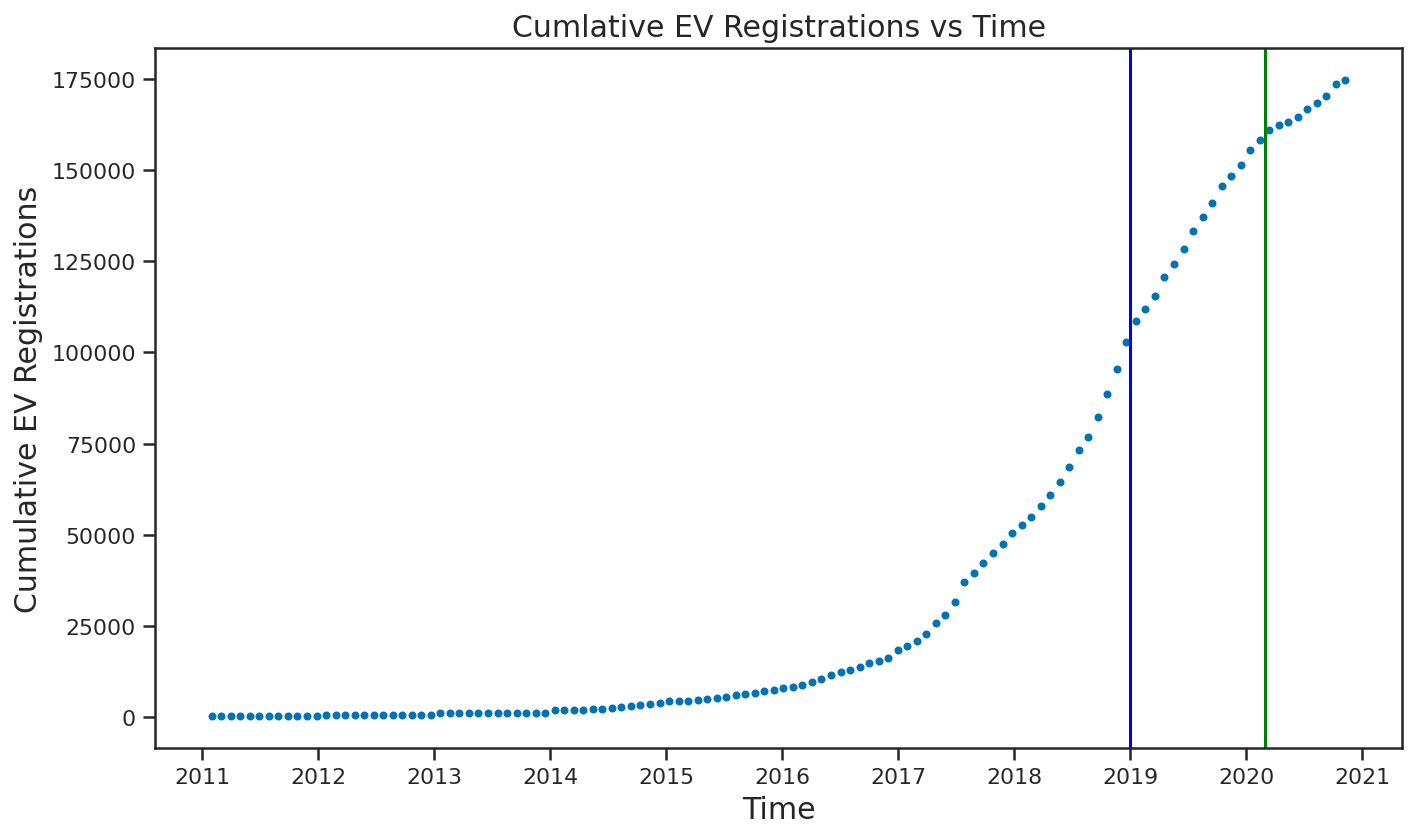

In [196]:
plt.figure(figsize=(10,6))
plt.plot(date_ranges[1:],cumulative_monthly_regs,'.')
plt.title('Cumlative EV Registrations vs Time',fontsize=15)
plt.axvline('2019-01',c='blue')
plt.axvline('2020-03',c='green')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Cumulative EV Registrations',fontsize=15)
plt.savefig('plots/cumulative_.png',dpi=150)
plt.tight_layout()

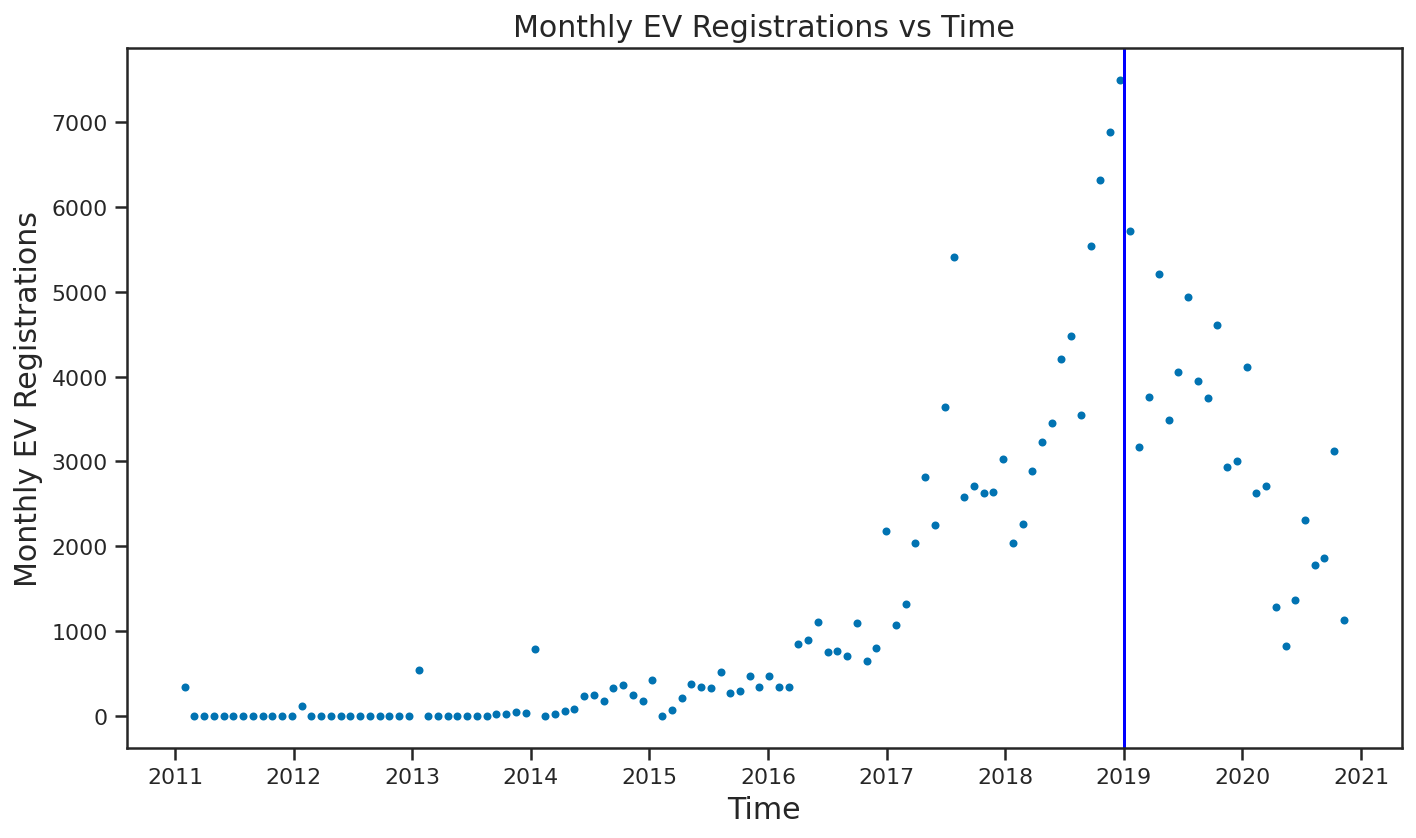

In [197]:
plt.figure(figsize=(10,6))
plt.plot(date_ranges[1:],monthly_regs,'.')
plt.title('Monthly EV Registrations vs Time',fontsize=15)
plt.axvline('2019-01',c='blue')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Monthly EV Registrations',fontsize=15)
plt.tight_layout()

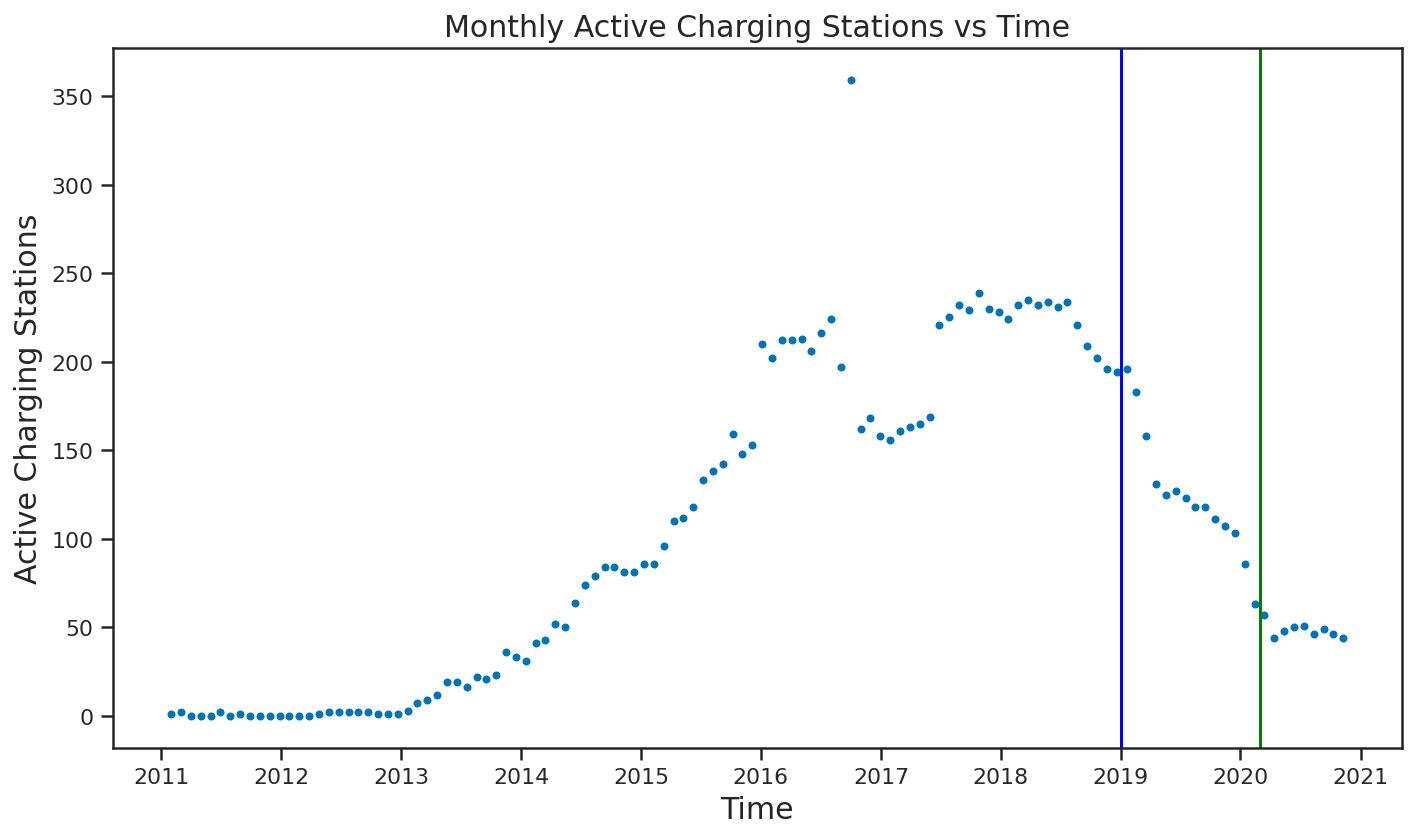

In [195]:
plt.figure(figsize=(10,6))
plt.plot(date_ranges[1:],monthly_ports,'.')
plt.title('Monthly Active Charging Stations vs Time',fontsize=15)
plt.axvline('2019-01',c='blue')
plt.axvline('2020-03',c='green')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Active Charging Stations',fontsize=15)
plt.tight_layout()

In [198]:
zip_codes_demo = np.unique(data_charging['ZIP Code'].values)

In [199]:
len(zip_codes_demo)

127

In [200]:
demo=[]
for zc in zip_codes_demo:
    demo.append(data_demo[data_demo['ZIP Code']==zc])

In [201]:
mean_masters_degree = []
mean_charging_energy = []
for i in range(len(demo)):
    if len(demo[i])!=0:
        mean_masters_degree.append(np.mean(demo[i]['Educational Attainment (Master\'s degree)'].values))
        mean_charging_energy.append(np.mean(data_charging[data_charging['ZIP Code']==zip_codes_demo[i]]['Energy (kWh)'].values))

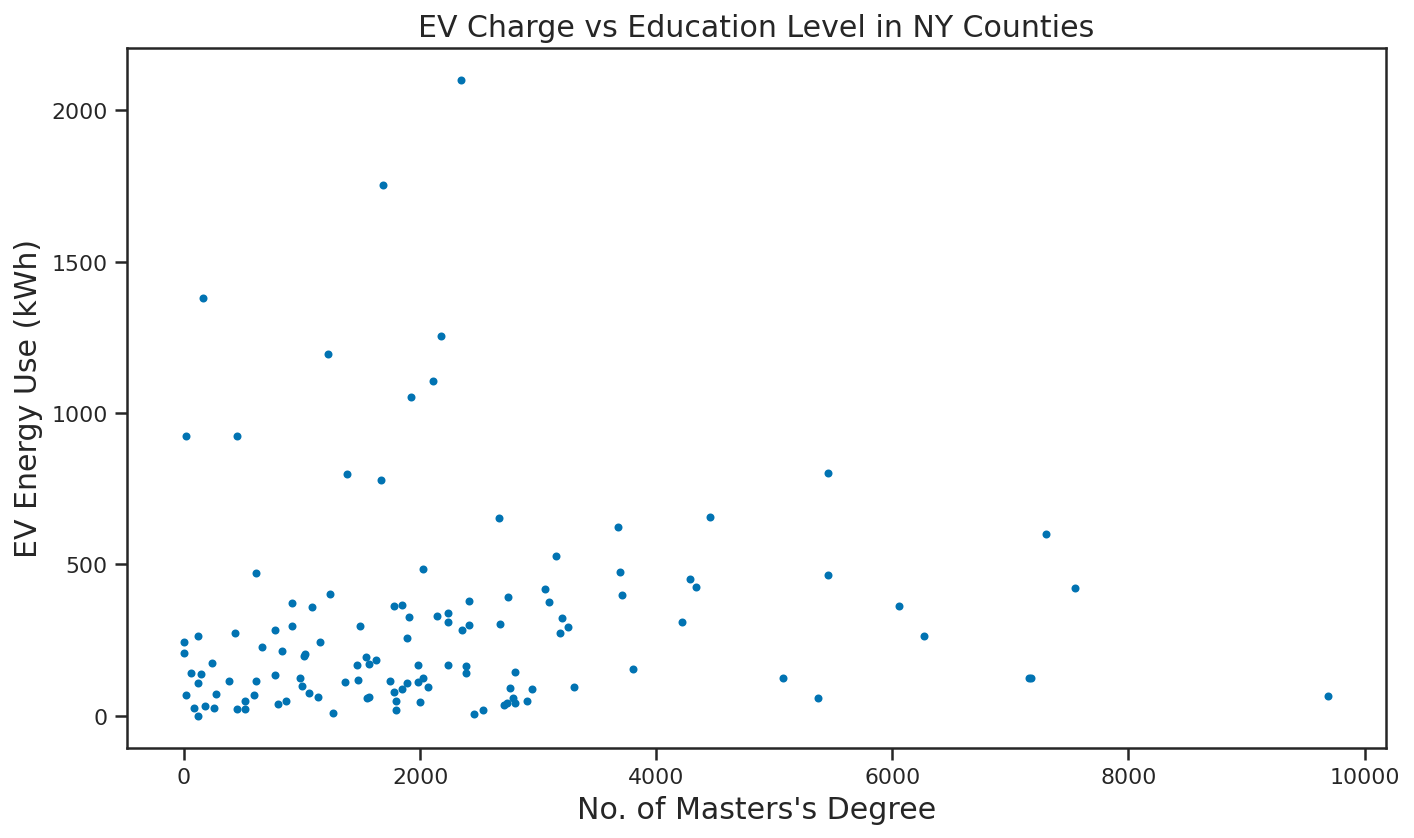

In [203]:
plt.figure(figsize=(10,6))
plt.plot(mean_masters_degree,mean_charging_energy,'.')
plt.title('EV Charge vs Education Level in NY Counties',fontsize=15)
plt.xlabel('No. of Masters\'s Degree',fontsize=15)
plt.ylabel('EV Energy Use (kWh)',fontsize=15)
plt.tight_layout()
#plt.savefig('plots/EV_Charge_vs_Education.png',dpi=150)
plt.show()

In [204]:
data_charging['Start Date'].min(),data_rebate['Submitted Date'].min()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2017-03-23 00:00:00'))

In [205]:
data_charging['Start Date'].max(),data_rebate['Submitted Date'].max()

(Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [206]:
date_ranges = pd.date_range(start=data_rebate['Submitted Date'].min(),end=data_charging['Start Date'].max(),freq="30.5D")

In [207]:
monthly_energy = []
number_of_purchases = []
for i in range(len(date_ranges)-1):
    start_date = date_ranges[i]
    end_date = date_ranges[i+1]
    after_start_charging = data_charging['Start Date'] >= start_date
    before_end_charging =  data_charging['Start Date'] <= end_date
    between_two_charging = after_start_charging & before_end_charging
    filtered_charging = data_charging.loc[between_two_charging]
    monthly_energy.append(np.mean(filtered_charging['Energy (kWh)'].values))
    
    after_start_rebate = data_rebate['Submitted Date'] >= start_date
    before_end_rebate =  data_rebate['Submitted Date'] <= end_date
    between_two_rebate = after_start_rebate & before_end_rebate
    filtered_rebate = data_rebate.loc[between_two_rebate]
    number_of_purchases.append(len(filtered_rebate))

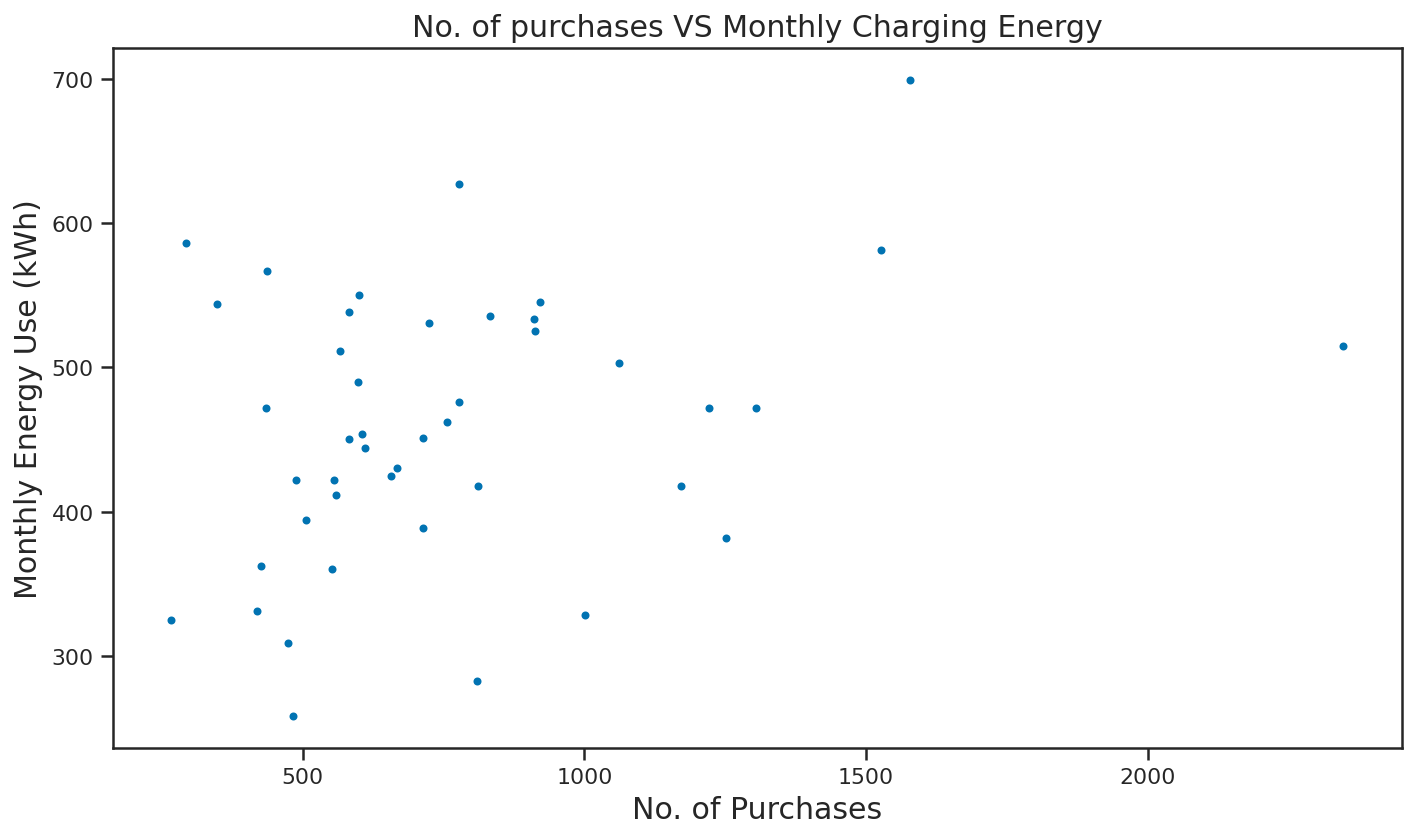

In [208]:
plt.figure(figsize=(10,6))
plt.plot(number_of_purchases,monthly_energy,'.')
plt.title('No. of purchases VS Monthly Charging Energy',fontsize=15)
plt.xlabel('No. of Purchases',fontsize=15)
plt.ylabel('Monthly Energy Use (kWh)',fontsize=15)
plt.tight_layout()
#plt.savefig('plots/Purchase_vs_Energy.png',dpi=150)
plt.show()

## Blue line below shows start of COVID Pandemic

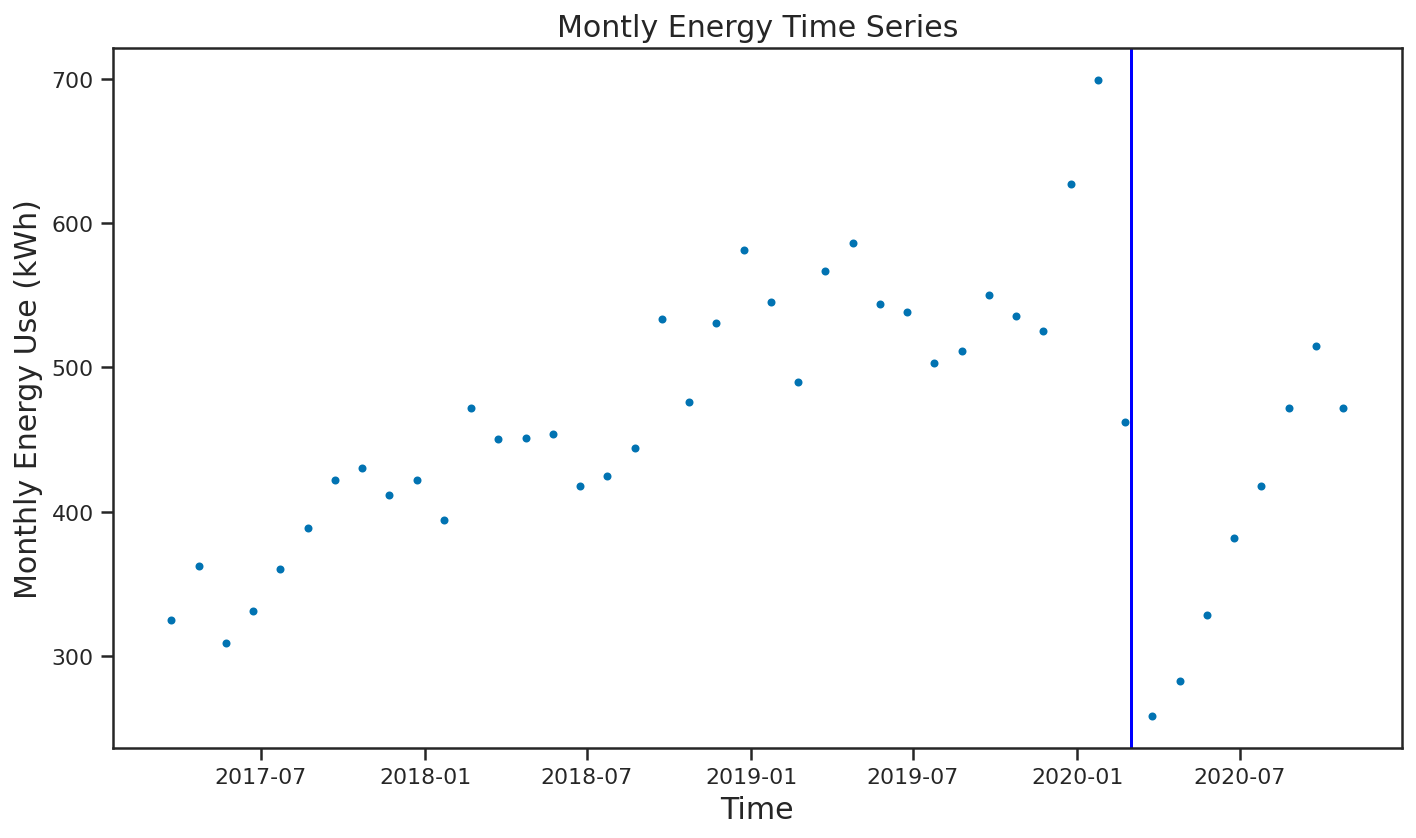

In [210]:
plt.figure(figsize=(10,6))
plt.plot(date_ranges[:-1],monthly_energy,'.')
plt.title('Montly Energy Time Series',fontsize=15)
plt.axvline('2020-03',c='blue')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Monthly Energy Use (kWh)',fontsize=15)
plt.tight_layout()
#plt.savefig('plots/Energy_time_series.png',dpi=150)
plt.show()

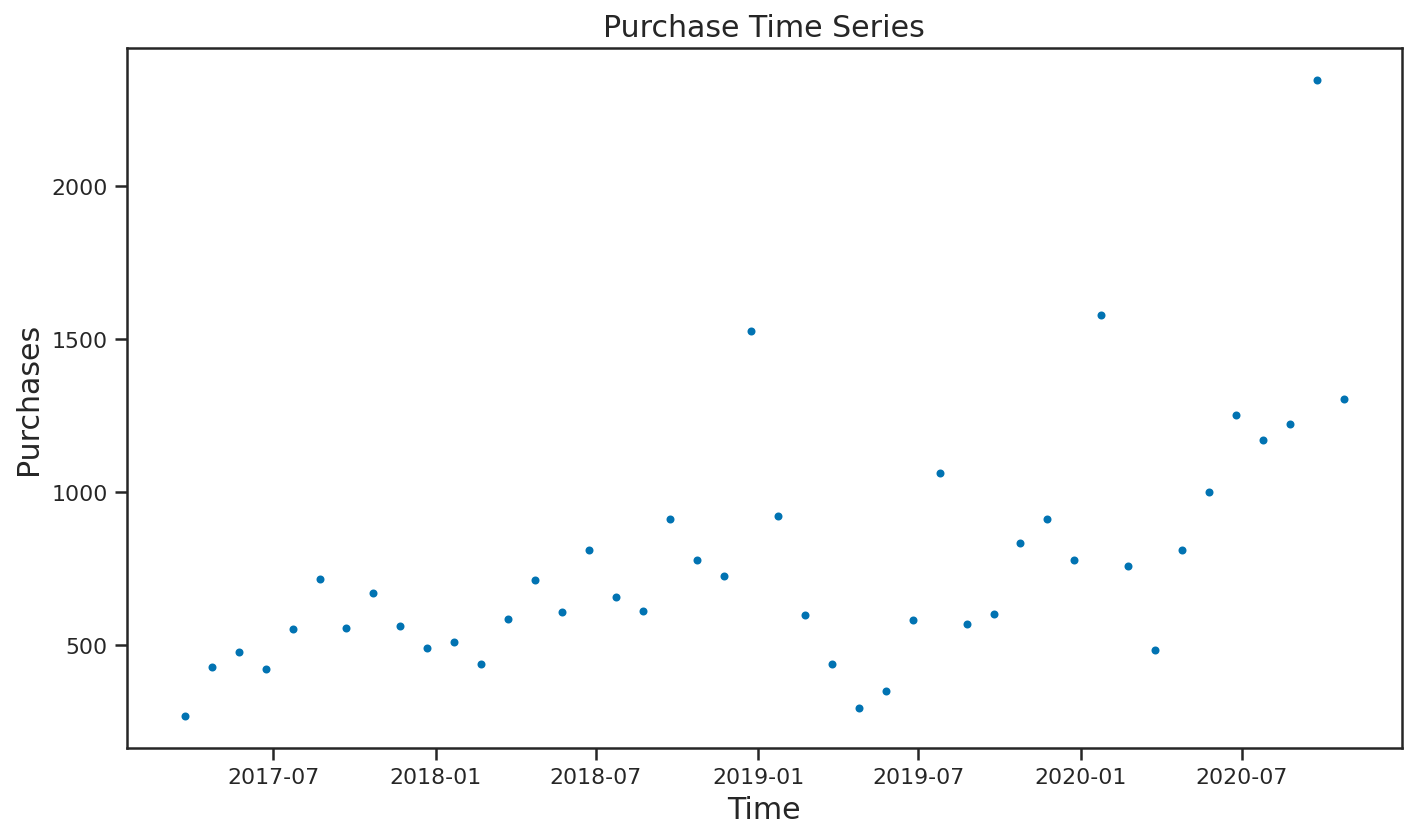

In [211]:
plt.figure(figsize=(10,6))
plt.plot(date_ranges[:-1],number_of_purchases,'.')
plt.title('Purchase Time Series',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Purchases',fontsize=15)
plt.tight_layout()
#plt.savefig('plots/Purchase_time_series.png',dpi=150)
plt.show()